<a href="https://colab.research.google.com/github/UsamaM194/Student_mark_prediction/blob/main/student_mark_prediction1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Libiaries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Load dataser

In [ ]:
path=r""
df=pd.read_csv("/content/drive/MyDrive/Dataset for std_mark/student_info(2).csv")

In [ ]:
df.head

<bound method NDFrame.head of      study_hours  student_marks
0           6.83          78.50
1           6.56          76.74
2            NaN          78.68
3           5.67          71.82
4           8.67          84.19
..           ...            ...
195         7.53          81.67
196         8.56          84.68
197         8.94          86.75
198         6.60          78.05
199         8.35          83.50

[200 rows x 2 columns]>

In [ ]:
df.shape

(200, 2)

## Discover and Visulization the data insights[link text](https://)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [ ]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


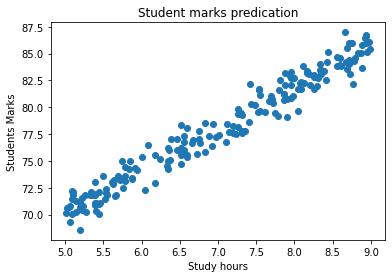

In [ ]:
plt.scatter(x=df.study_hours, y=df.student_marks)
plt.xlabel("Study hours")
plt.ylabel("Students Marks")
plt.title("Student marks predication")
plt.show()

## Prepare the data for machine learning algorthim

In [ ]:
# clean the dataset

In [ ]:
df.isnull()

,study_hours,student_marks
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False
...,...,...
195,False,False
196,False,False
197,False,False
198,False,False


In [ ]:
# how many null values present in the data

In [ ]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [ ]:
# mean for the data values
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [ ]:
# fill the missing values
df2=df.fillna(df.mean())

In [ ]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [ ]:
df2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


## split Dataset

In [ ]:
X = df2.drop('student_marks', axis='columns')
y =  df2.drop('study_hours', axis='columns')

In [ ]:
print('shape of X =' , X.shape)
print('Shape of y=', y.shape)

shape of X = (200, 1)
Shape of y= (200, 1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
print("Shape of X_train=", X_train.shape)
print("Shape of y_train=", y_train.shape)
print("Shape of X_test=", X_test.shape)
print("Shape of y_test=", y_test.shape)

Shape of X_train= (150, 1)
Shape of y_train= (150, 1)
Shape of X_test= (50, 1)
Shape of y_test= (50, 1)


## Select the model and train

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

## Predict the std marks using study hours

In [ ]:
lr.predict([[4]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[66.12803854]])

In [ ]:
lr.predict([[4]]).round(2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[66.13]])

In [ ]:
y_pred = lr.predict(X_test)
y_pred

array([[85.48435946],
       [72.77685609],
       [81.66817423],
       [73.68172475],
       [83.39922732],
       [72.18672435],
       [70.14093434],
       [79.8190948 ],
       [81.66817423],
       [80.36988442],
       [79.62238422],
       [80.88133192],
       [78.48146286],
       [81.62883212],
       [71.99001377],
       [71.87198743],
       [79.97646326],
       [81.78620058],
       [75.45211995],
       [75.806199  ],
       [71.08514511],
       [77.91473464],
       [81.39277942],
       [74.03580379],
       [70.33764491],
       [84.26475387],
       [77.65527843],
       [84.50080656],
       [73.76040898],
       [78.95356825],
       [78.8355419 ],
       [79.15027883],
       [74.94067245],
       [81.0780425 ],
       [85.13028041],
       [76.63238342],
       [71.39988204],
       [84.81554349],
       [76.3176465 ],
       [75.37343572],
       [76.19962015],
       [71.5572505 ],
       [76.16027804],
       [70.33764491],
       [75.41277784],
       [78

In [ ]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["study_hours", "std_marks_original", "std_marks_predicted"])
         

,study_hours,std_marks_original,std_marks_predicted
0,8.920000,86.41,85.484359
1,5.690000,73.61,72.776856
2,7.950000,82.68,81.668174
3,5.920000,74.34,73.681725
4,8.390000,83.37,83.399227
5,5.540000,72.38,72.186724
6,5.020000,70.58,70.140934
7,7.480000,80.17,79.819095
8,7.950000,80.86,81.668174
9,7.620000,79.53,80.369884


## Tune Model

In [ ]:
lr.score(X_test, y_test)

0.9576620348332676

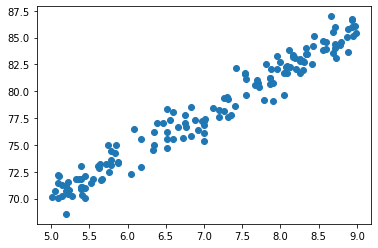

In [ ]:
plt.scatter(X_train, y_train)

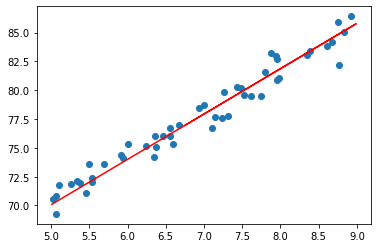

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_train, lr.predict(X_train), color='r')

## Present your solution

In [ ]:
# save the model

In [ ]:
import joblib 
joblib.dump(lr,'Student_mark_prediction_model.pkl')

['Student_mark_prediction_model.pkl']

In [ ]:
# load the model
model = joblib.load('Student_mark_prediction_model.pkl')

In [ ]:
model.predict([[5.7]]).round(2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[72.82]])